<a href="https://colab.research.google.com/github/Mohamed-Maher5/Unsupervised-Machine-Learning/blob/main/Kmans_Hierarchical/Clusturing_using_Kmeans_and_Hierarchical_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
## Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## sklearn -- Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

## sklearn -- model-selection
from sklearn.model_selection import GridSearchCV

## sklearn -- metrics
from sklearn.metrics import accuracy_score

## sklearn -- Models
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

**Study the dataset**

In [ ]:
file_path = '/content/Mall_Customers.csv'
Mall_Customers_dataset = pd.read_csv(file_path)

In [ ]:
Mall_Customers_dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
## check the info (nulls and datatypes)
Mall_Customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
## some statistics of the dataset
Mall_Customers_dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
## check the nulls
Mall_Customers_dataset.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

WE CAN SEE THERE IS NO NULL VALUES

**Exploratory Data Analysis (EDA)**

In [ ]:
Mall_Customers_dataset.rename(index=str, columns={'Annual Income (k$)': 'Income','Spending Score (1-100)': 'Score'}, inplace=True)
Mall_Customers_dataset.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
Mall_Customers_dataset.drop(['CustomerID','Genre'],axis=1,inplace=True)

It shows the number of data points that fall within each bin --



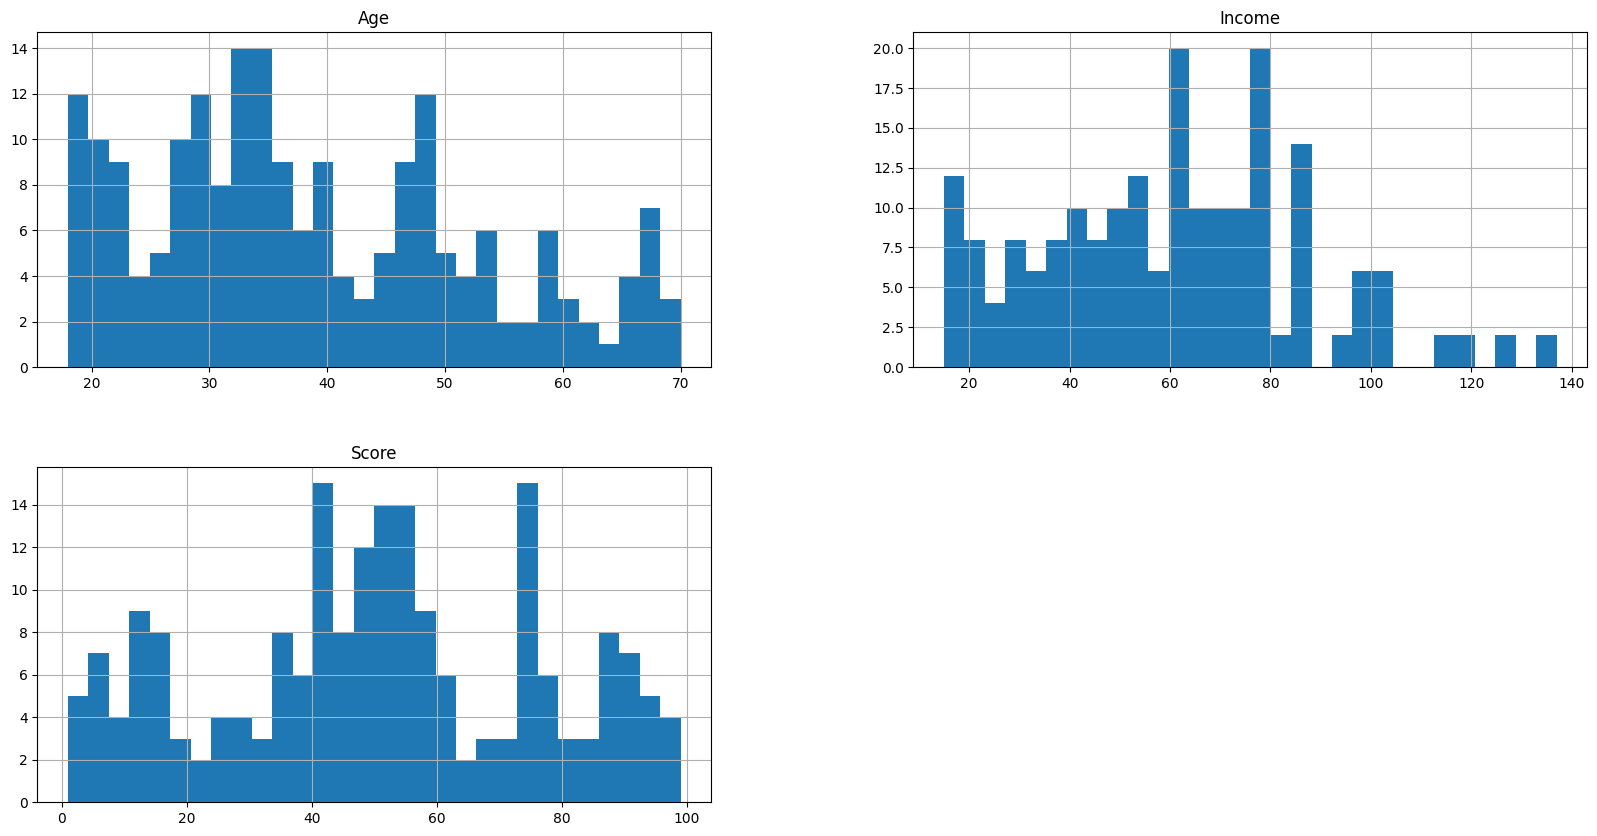

In [ ]:
## Histogram Distribution of Numerical Variables in Dataset
print('It shows the number of data points that fall within each bin --\n')
Mall_Customers_dataset.hist(bins=30, figsize=(20,10))
plt.show()

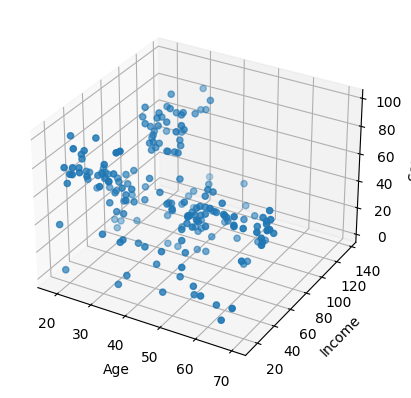

In [ ]:
### Plotting

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(Mall_Customers_dataset['Age'], Mall_Customers_dataset['Income'], Mall_Customers_dataset['Score'])

# Set the axis labels
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

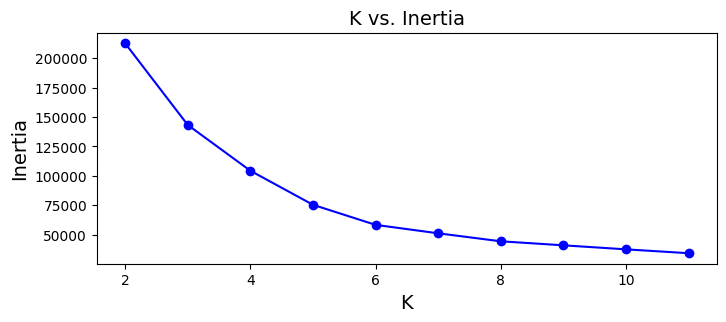

In [ ]:
k_choose = np.arange(2, 12, 1)  ## space we search in

k_with_inertia = {}

for val in k_choose:  ## loop over the space of K
    ## define the algorithm
    kmeans_each = KMeans(n_clusters=val, n_init=10, algorithm='auto', init='k-means++', random_state=42)
    kmeans_each.fit(Mall_Customers_dataset)
    each_inertia = kmeans_each.inertia_   ## get the best inertia for each K
    k_with_inertia[val] = each_inertia    ## to the dictionary


## Plotting each K with the opposite Inertia
plt.figure(figsize=(8, 3))
plt.plot(k_with_inertia.keys(), k_with_inertia.values(), 'bo-')
plt.title('K vs. Inertia', fontsize=14)
plt.xlabel('K', fontsize=14)
plt.ylabel('Inertia', fontsize=14)

plt.show()

**Model Selection**

Kmeans Algorithm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


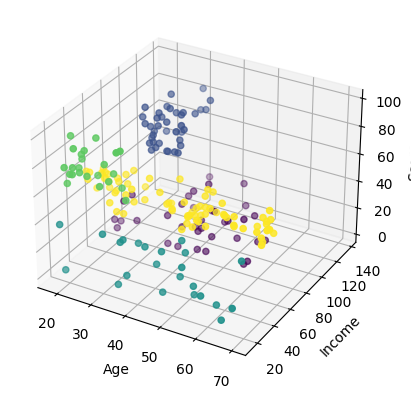

In [ ]:
kmeans = KMeans(n_clusters=5).fit(Mall_Customers_dataset)
Mall_Customers_dataset['Labels'] = kmeans.labels_

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(Mall_Customers_dataset['Age'], Mall_Customers_dataset['Income'], Mall_Customers_dataset['Score'],c=Mall_Customers_dataset['Labels'])

# Set the axis labels
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')

plt.show()

Mall_Customers_dataset.drop(['Labels'],inplace=True,axis=1)

Hierarchical Algorithm

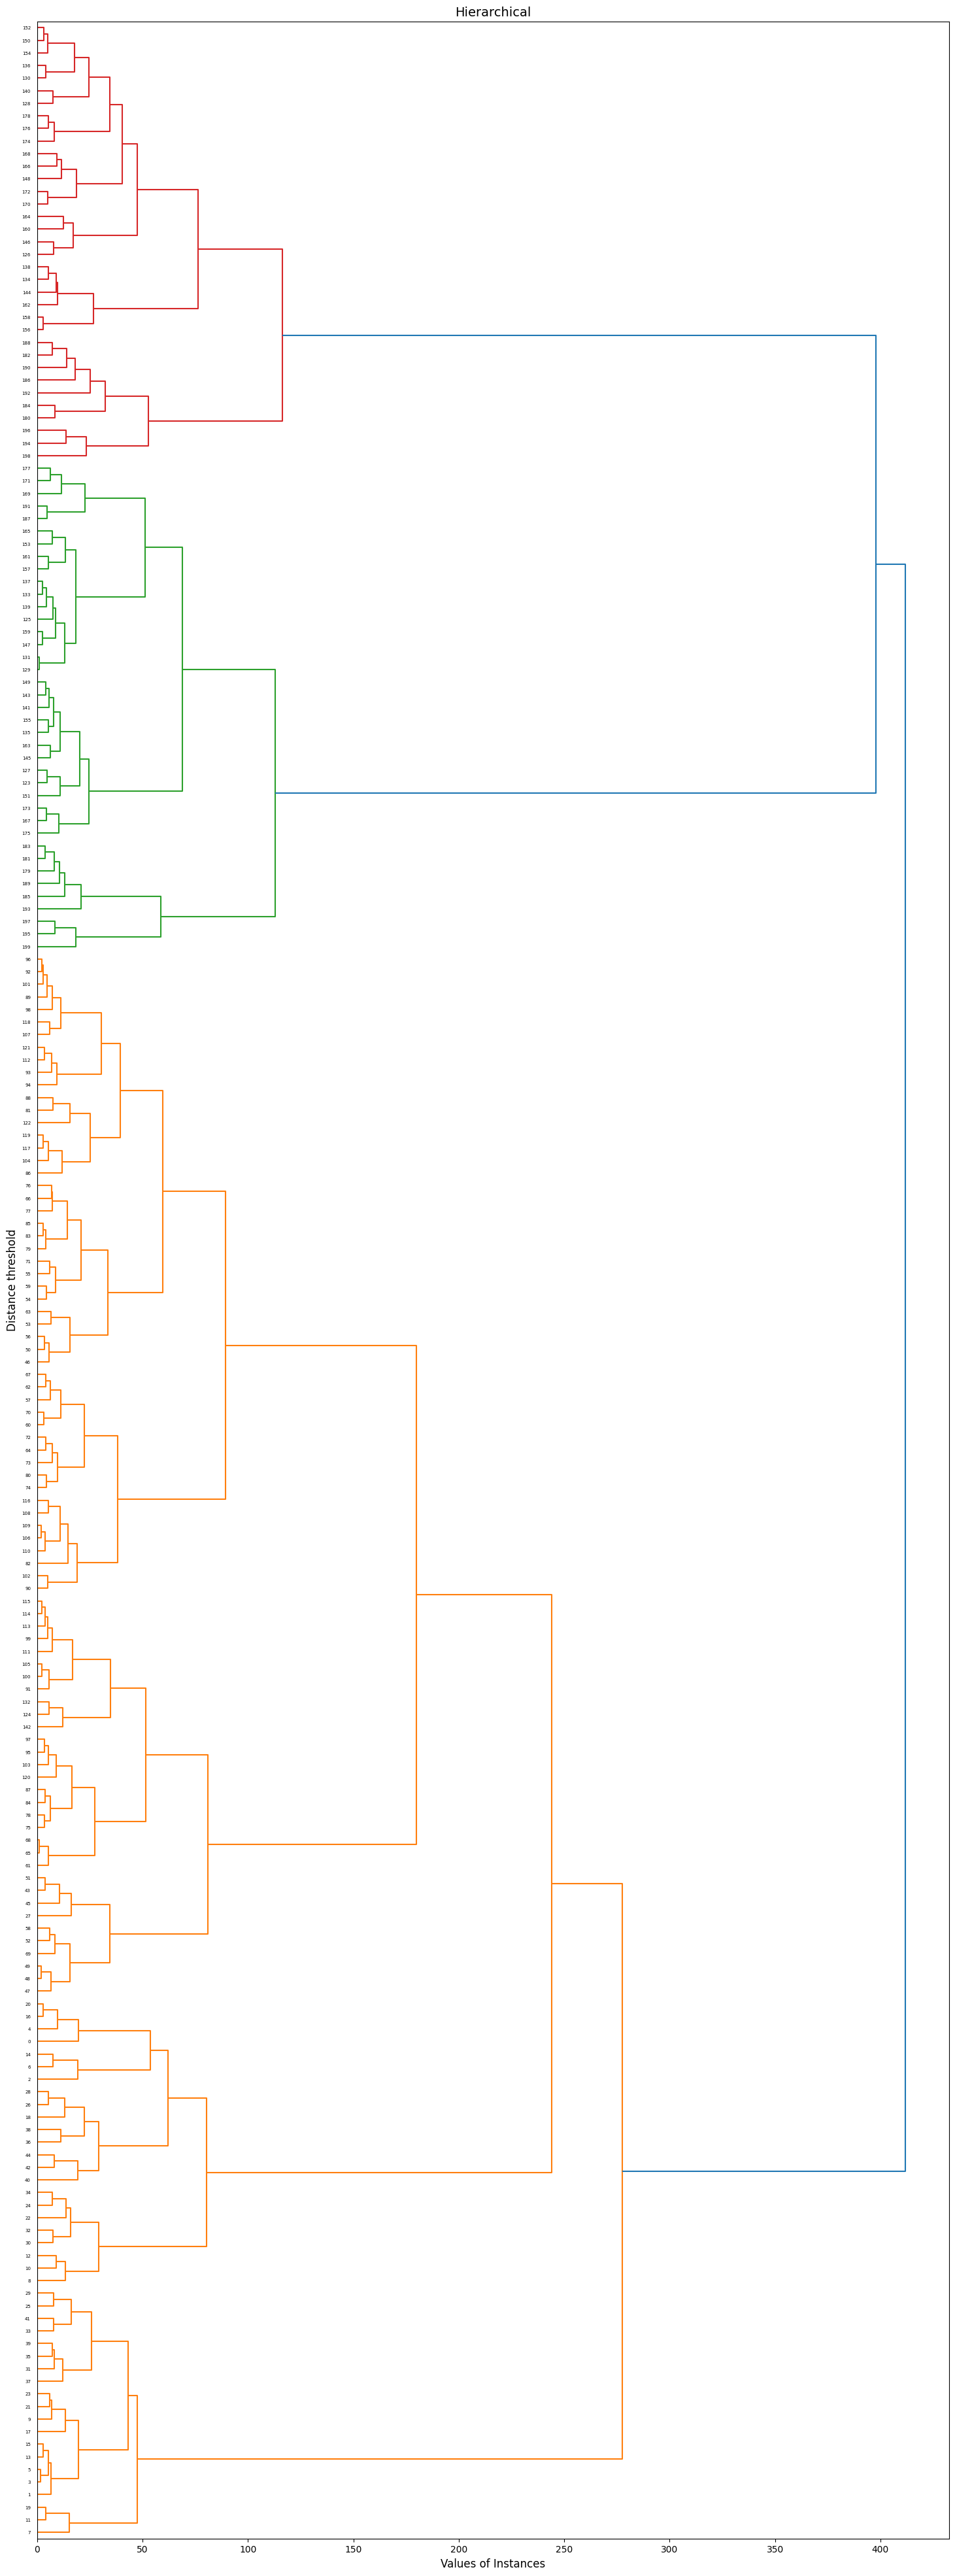

In [ ]:
## Using scipy
clustered_scipy = linkage(Mall_Customers_dataset, method='ward', metric='euclidean')

## for plotting
plt.figure(figsize=(18, 50))
dendro = dendrogram(clustered_scipy, leaf_rotation=0, leaf_font_size=5, orientation='right')
plt.title('Hierarchical', fontsize=14)
plt.xlabel('Values of Instances', fontsize=12)
plt.ylabel('Distance threshold', fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


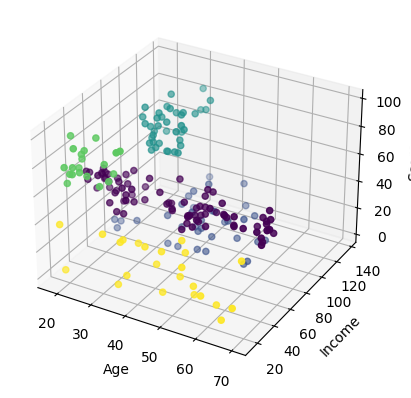

In [ ]:
## Using sklearn
clustered_sklearn = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(Mall_Customers_dataset)
Mall_Customers_dataset['Labels'] = clustered_sklearn.labels_

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(Mall_Customers_dataset['Age'], Mall_Customers_dataset['Income'], Mall_Customers_dataset['Score'],c=Mall_Customers_dataset['Labels'])

# Set the axis labels
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')

plt.show()